In [1]:
# import modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn import preprocessing
from joblib import dump, load
from sklearn.linear_model import LinearRegression

iris = load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])


Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [3]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

classifier_knn = KNeighborsClassifier(n_neighbors=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)

# finding accuracy for comparing actual response values(y_test) with predicted response value(y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Providing sample data and the method will make predictions out of that data 

sample = [[5,5,3,2], [2,4,3,5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Preditctions:", pred_species)




(90, 4)
(60, 4)
(90,)
(60,)
Accuracy: 0.9833333333333333
Preditctions: ['versicolor', 'virginica']


In [4]:
# use joblib to store file

#joblib.dump(classifier_knn, 'iris_classifier_knn.joblib')
#joblib.load('iris_classifier_knn.joblib')

In [5]:
# data processing using binarisation
# Using scikit_learn package - preprocessing
input_data = np.array([[2.1, -1.9, 5.5],
                     [-1.5, 2.4, 3.5],
                     [0.5, -7.9, 5.6],
                     [5.9, 2.3, -5.8]])
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(input_data)
print("\nBinarized data:\n", data_binarized)



Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [6]:
# remove the mean and centre the data around zero - standardize

# display the mean and the standard deviation of the input data

print("Mean =", input_data.mean(axis=0))
print("Std Deviation = ", input_data.std(axis=0))

# Removing the mean and the standard deviation of the input data

data_scaled = preprocessing.scale(input_data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))


Mean = [ 1.75  -1.275  2.2  ]
Std Deviation =  [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]


In [7]:
# using preprocessing to scale the features vector.

data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)



Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


In [8]:
# modify the feature vectors _ Normalized to give a common scale

# using Least Absolute Deviation as L1
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)



L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]


In [9]:
# modify the feature vectors _ Normalized to give a common scale

# using Least Squares as L2
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL2 normalized data:\n", data_normalized_l2)



L2 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


In [10]:
# Getting the computer to understand the data - various methods

# Table in form of a 2D grid

iris = sns.load_dataset('iris')
iris.head()
# rows of matrix are called 'samples'
# columns of the matrix are called 'features'

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


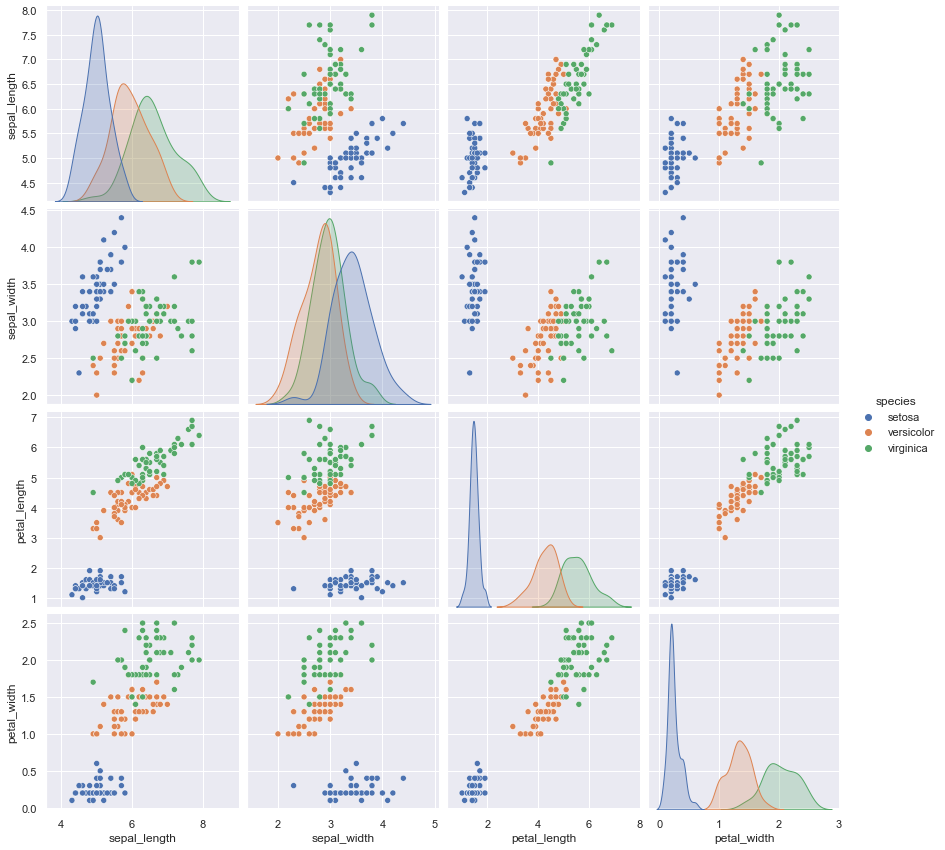

In [11]:
# Data table 2D with shape [n_samples, n_features]

iris = sns.load_dataset('iris')
%matplotlib inline
sns.pairplot(iris, hue='species', height=3);

In [12]:
X_iris = iris.drop('species', axis=1)
print("\n X_iris:", X_iris.shape)
y_iris = iris['species']
print("\n y_iris:", y_iris.shape)



 X_iris: (150, 4)

 y_iris: (150,)


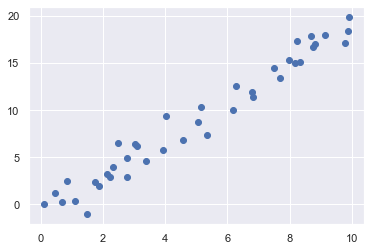

In [13]:
# Estimator API
# interface for ML applications implementing the algorithms
# chose a class of model and import the estimator
# chose hyperparameters - instantiate the class values
# arrange data to fit model call fit9) = X and y

rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
plt.scatter(x,y);

#estimator.fit(data)
#estimator = Estimator(param-1, par)

In [14]:
# chose Linear Regression

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# reshape x feature to a matrix [n_samples, n_features]
X = x[:, np.newaxis]
X.shape



(40, 1)